# P2 SAD - Algorítimo para detectar churn
### Autores: Beatriz Lima Roman, Felipe Yamamoto Guerreiro, José Matheus Gomes de Sá, Luis Felipe Gentil Menardi

O Algorítmo visa realizar a predição de Churn, dado relacionado à evasão do cliente, da empresa Telco. Para isso, será realizado o método de Classificação por <b>Árvore de Decisão</b> (<i>Decision Tree Classifier</i>) e o método de **Poda de Custo de Complexidade** (*Pruning Complexity*) disponíveis na biblioteca <b>sklearn</b>.

Na plataforma Kaggle estão disponíveis <a href="https://www.kaggle.com/ridhoaryo/telco-churn-analysis-and-modeling">os dados originais</a>. O dataset usado no notebook foi previamente manipulado para aplicação da avaliação dos alunos.

Árvores de Classificação é um método de **Aprendizagem de Máquina** (*Machine Learning*) quando já se sabe quando as decisões são feitas. Para isso, sabe-se a consequência da presença de uma restrição pré-determinada. Facilitando a justificativa da predição, uma vez que é possível validar conforme os passos realizados qual foi a decisão final.

----

#### As versões usadas foram:
- Python 3.6.13 | packaged by conda-forge 
- Jupyter Notebook 6.2.0
- IPython 7.16.1
- Pandas 1.3.1
- NumPy 1.21
- matplolib 3.4.2
- scikit-learn 0.24
- seaborn 0.11.1

**Observação:** Caso deseje replicar este código em sua máquina, é necessário instalar as bibliotecas citadas (com exceção do Jupyter Notebook e IPython) nas versões apresentadas ou superior.

----

**Céditos:** Como base para construção desse notebook, foi usada <a href="https://www.youtube.com/watch?v=q90UDEgYqeI&t=8s">a vídeo-aula de Josh Starmer sobre árvores de decisão</a>.

----

## Importação de bibliotecas

In [1]:
#Importando bibliotecas
import pandas as pd # para carregar e manipular os dados e para realizar One-Hot Encoding
import numpy as np # para calcular média e desvio padrão
import matplotlib.pyplot as plt # para desenhar gráficos
import seaborn as sns # para desenhar gráficos
from sklearn.tree import DecisionTreeClassifier # para construir a árvore de classficação
from sklearn.tree import plot_tree # para desenhar a árvore de classficação
from sklearn.model_selection import train_test_split # para dividir os dados entre conjuntos para teste e treino
from sklearn.model_selection import cross_val_score # para fazer validação cruzada (cross validation)
from sklearn.metrics import confusion_matrix # para criar a matriz de confusão (confusion matrix)
from sklearn.metrics import plot_confusion_matrix # para desenhar a matriz de confusão (confusion matrix)

----

## Base de dados - da importação à manipulação
Nessa etapa serão realizados todos os processos para importar os dados da base em formato .csv e manipulá-los para que estejam dispostos conforme as necessidades do método de Classificação por Árvore de Decisão.

A preocupação inicial é transformar todos os dados em formato <b>object</b> em tipos numéricos <b>float</b> (números de ponto flutuante) ou <b>int</b> (números inteiros). Além disso, é desejado que não existam mais de dois filhos para cada coluna, para que o algorítmo consiga identificar as decisões como sendo binárias 

A referência para a necessidade de uso de 



In [2]:
#Chamando base
df = pd.read_csv('churn_ibm.csv')

In [3]:
df['TotalCharges'].unique()#Tranformar em coluna: contract;MultipleLines;InternetService;OnlineSecurity;tenure;OnlineBackup;TechSupport;StreamingTV;StreamingMovies;PaymentMethod;MonthlyCharges;TotalCharges

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [4]:
#teste das colunas
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Explicação dos dados da tabela:

- **CustomerID**: Um ID único vinculado a cada cliente.
- **Gender**: O gênero do cliente: Masculino, Feminino
- **Senior Citizen**: Indica se o cliente tem 65 anos ou mais: Sim, Não
- **Partner**: Indica se o cliente tem um parceiro: Sim, Não
- **Dependents**: Indica se o cliente mora com algum dependente: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.
- **Tenure Months**: Indica a quantidade total de meses que o cliente esteve na empresa, considerando até o final do trimestre especificado.
- **Phone Service**: Indica se o cliente é assinante do serviço telefônico residencial da empresa: Sim, Não
- **Multiple Lines**: Indica se o cliente é assinante de mais de uma linha telefônica da empresa: Sim, Não
- **Internet Service**: Indica se o cliente é assinante de um serviço de internet da empresa: Não, DSL, Fibra Óptica, Cabo.
- **Online Security**: Indica se o cliente assina o serviço adicional de segurança online da empresa: Sim, Não
- **Online Backup**: Indica se o cliente assina um serviço adicional de backup online: Sim, Não
- **Device Protection**: Indica se o cliente assina o plano adicional de proteção de dispositivo para seu equipamento de Internet: Sim, Não
- **Tech Support**: Indica se o cliente assina o plano adicional de suporte técnico com tempos de espera reduzidos: Sim, Não
- **Streaming TV**: Indica se o cliente usa o serviço de Internet para transmitir programação de televisão de um provedor terceirizado: Sim, Não. A empresa não cobra taxa adicional por esse serviço.
- **Streaming Movies**: Indica se o cliente usa o serviço de Internet para streaming de filmes de um provedor terceirizado: Sim, Não. A empresa não cobra taxa adicional por este serviço.
- **Contract**: Indica o tipo de contrato atual do cliente: mensal, um ano, dois anos.
- **Paperless Billing**: Indica se o cliente escolheu o pagamento sem papel: Sim, Não
- **Payment Method**: Indica o método de pagamento com o qual o cliente paga sua fatura: saque, cartão de crédito, cheque
- **Monthly Charges**: Indica a cobrança mensal total do cliente considerando todos os seus serviços da empresa.
- **Total Charges**: Indica os encargos totais do cliente, calculados ao final do trimestre especificado.
- **Churn Label**: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente não deixou a empresa neste trimestre. Diretamente relacionado ao valor de rotatividade (Churn Value).

In [6]:
#Info base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Verificando dados binários

Como não há dados nulos, a preocupação inicial será transformar todos os dados em formato <b>object</b> em tipos numéricos <b>float</b> (números de ponto flutuante) ou <b>int</b> (números inteiros). Mas, antes desse procedimento, é desejado que não existam mais de dois filhos para cada coluna, para que o algorítmo consiga identificar as decisões como sendo binárias. 

A referência para a necessidade de uso de variáveis binárias, isto é, com apenas dois filhos, está disponível no <a href="https://stackoverflow.com/questions/38931245/why-the-decision-tree-structure-is-only-binary-tree-for-sklearn-decisiontreeclas">Stackoverflow</a>

Então, será realizado o procedimento de verificação de quais colunas em formato **object** possuem mais de dois valores únicos. Note que foram excluídas colunas do tipo object que possuem apenas "yes" e "no", uma vez que depreende-se que são dados binários.

As colunas de **Churn** e **customerID** também foram ignoradas. A primeira por ser o dado preditivo que buscamos e não uma decisão, a segunda por não ser relevante para os dados.


In [7]:
columns=['gender',
         'MultipleLines',
         'InternetService',
         'OnlineSecurity',
         'OnlineBackup',
         'TechSupport',
         'StreamingTV',
         'StreamingMovies',
         'Contract',
         'PaymentMethod',
         'PaperlessBilling',
         'DeviceProtection']
for i in columns:
    if len(df[i].unique())<3:
        columns.remove(i)
columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'DeviceProtection']

### Transformando dados em binários com pd.get_dummies()

Essa função realizará o processo de criar colunas para dados com mais de 2 valores categóricos e, em seu conteúdo, atribuirá 0 para "não" e 1 para "sim".

**Por exemplo**: A coluna MultipleLines possui os valores categóricos: {"yes", "no", "No phone service"}

    Então serão criadas as colunas: MultipleLines_yes, MultipleLines_no e MultipleLines_No_phone_service com os valores 0 ou 1, sendo 0 negativo para pertencimento do cliente à coluna e 1 positivo.

In [8]:
X_encoded = pd.get_dummies(df, columns=['Contract',
                                       'MultipleLines',
                                       'InternetService',
                                       'OnlineSecurity',
                                       'OnlineBackup',
                                       'TechSupport',
                                       'StreamingTV',
                                       'StreamingMovies',
                                       'PaymentMethod',
                                       'DeviceProtection'])
X_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,29.85,29.85,...,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,56.95,1889.50,...,1,0,0,0,0,0,1,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,53.85,108.15,...,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No,42.30,1840.75,...,1,0,0,1,0,0,0,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,70.70,151.65,...,1,0,0,0,0,1,0,1,0,0


### Transformando objetos com apenas dois filhos em valores numéricos

Nas colunas identificadas que estão em forma de objetos e que apresentam apenas 2 filhos, serão trocados seus valores para valores numéricos.

In [9]:
#Tranformar string em binário
lista_troca=['Partner','Dependents','PhoneService','PaperlessBilling','gender']

for i in lista_troca:
    X_encoded[i] = X_encoded[i].map({'Yes': 1, 'No': 0,'Male': 1, 'Female': 0})

X_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,0,0,1,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,1,0,0,0,0,0,1
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,0,0,1,0,1,0,0


## Valores quantitativos

Nas colunas "tenure", "MonthlyCharges" e "TotalCharges", temos que seus valores são quantitativos, dessa forma, deverá ser realizada uma decisão para determinar quais intervalos de valores serão usados na tomada de decisão.

Para auxiliar na tomada de decisão de quais valores são determinados, decidiu-se que seriam levantados:

- **Em tenure**: quantos meses o cliente ficou na empresa até realizar Churn
- **Em MonthlyCharges**: qual a distriuição da cobrança mensal dos clientes que realizaram Churn
- **Em TotalCharges**: quais os encargos totais do trimestre dos clietes que realizaram Churn

**VALE RESSALTAR:** Como busca-se encontrar usuários que mais realizam Churn, serão feitas escolhas onde os dados estão mais concentrados.

### Tenure

In [10]:
# Separando uma base somente com dados com Churn positivos e a distribuição de tenure
base=X_encoded.groupby('Churn').count()[['customerID']]
base_teste=X_encoded.loc[(X_encoded['Churn'])=='Yes']
teste=base_teste.groupby('tenure').count()[['customerID']]
teste

,customerID
tenure,
1,380
2,123
3,94
4,83
5,64
...,...
68,9
69,8
70,11


<AxesSubplot:xlabel='tenure', ylabel='Count'>

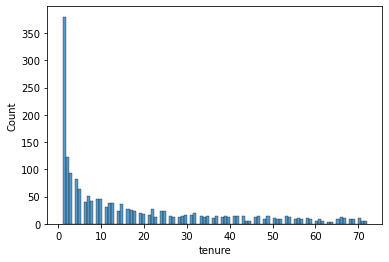

In [11]:
# Desenhando a distribuição de tenure
sns.histplot(base_teste['tenure'],bins=100)

#### Decisão para tenure
Decidiu-se adotar os valores:

    0: tenure<=12
    1: tenura>12

In [12]:
# Separando conforme a decisão e verificando se há somente dois valores únicos (0, 1)
X_encoded['tenure'] = np.where(X_encoded['tenure']<=12,0,1)
X_encoded['tenure'].unique()

array([0, 1])

### MonthlyCharges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

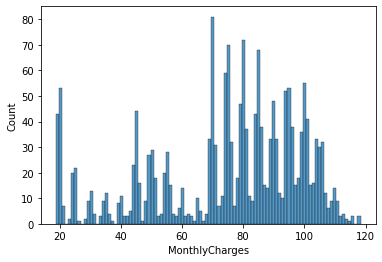

In [13]:
# Desenhando a distribuição de MonthlyCharges
sns.histplot(base_teste['MonthlyCharges'],bins=100)

#### Decisão para MonthlyCharges
Decidiu-se adotar os valores:

    0: MonthlyCharges<=60
    1: MonthlyCharges>60

In [14]:
# Separando conforme a decisão e verificando se há somente dois valores únicos (0, 1)
X_encoded['MonthlyCharges'] = np.where(X_encoded['MonthlyCharges']<=60,0,1)
X_encoded['MonthlyCharges'].unique()

array([0, 1])

### TotalCharges

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

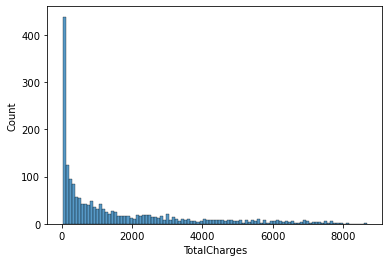

In [15]:
# Desenhando a distribuição de TotalCharges
sns.histplot(base_teste['TotalCharges'],bins=100)

#### Decisão para TotalCharges
Decidiu-se adotar os valores:

    0: TotalCharges<=1000
    1: TotalCharges>1000

In [16]:
# Separando conforme a decisão e verificando se há somente dois valores únicos (0, 1)
X_encoded['TotalCharges'] = np.where(X_encoded['TotalCharges']<=1000,0,1)
X_encoded['TotalCharges'].unique()

array([0, 1])

In [17]:
# Verificando se os dados no formato correto e não há dados nulos
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   customerID                               7032 non-null   object
 1   gender                                   7032 non-null   int64 
 2   SeniorCitizen                            7032 non-null   int64 
 3   Partner                                  7032 non-null   int64 
 4   Dependents                               7032 non-null   int64 
 5   tenure                                   7032 non-null   int32 
 6   PhoneService                             7032 non-null   int64 
 7   PaperlessBilling                         7032 non-null   int64 
 8   MonthlyCharges                           7032 non-null   int32 
 9   TotalCharges                             7032 non-null   int32 
 10  Churn                                    7032 non-null   obj

In [18]:
# Verificando se os dados estão conforme
X_encoded.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.690700,0.903299,0.592719,0.586177,0.588595,0.551052,...,0.395478,0.216155,0.388367,0.219283,0.216297,0.336320,0.228100,0.439989,0.216155,0.343857
std,0.500014,0.368844,0.499729,0.457629,0.462238,0.295571,0.491363,0.492552,0.492123,0.497422,...,0.488988,0.411650,0.487414,0.413790,0.411748,0.472483,0.419637,0.496421,0.411650,0.475028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
### Separando os dados

Manipulada a base de dados e estandos todos nas conformidades esperadas, os dados serão copiados em variáveis de dependentes (x) e variável independente (y), sendo:

    x: variáveis binárias tratadas
    y: Churn

In [19]:
# Churn sendo isolado nas variáveis independentes
y = X_encoded['Churn'].copy()
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [20]:
# Churn sendo retirado das variáveis dependentes (x)
X = X_encoded.drop('Churn', axis=1).copy()
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
2,3668-QPYBK,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,9237-HQITU,0,0,0,0,0,1,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [21]:
# custumerID está sendo retirado uma vez que não é relevante para o resultado
x = X.drop('customerID', axis=1).copy()
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0


----

## Criando a Árvore de Decisão

Divididos os dados, damos início à criação da Árvore de Decisão

In [22]:
## Dividindo os dados entre teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=35)

## criando a árvore de decisão e encaixando os dados de treino
clf_dt = DecisionTreeClassifier(random_state=35)
clf_dt = clf_dt.fit(x_train, y_train)

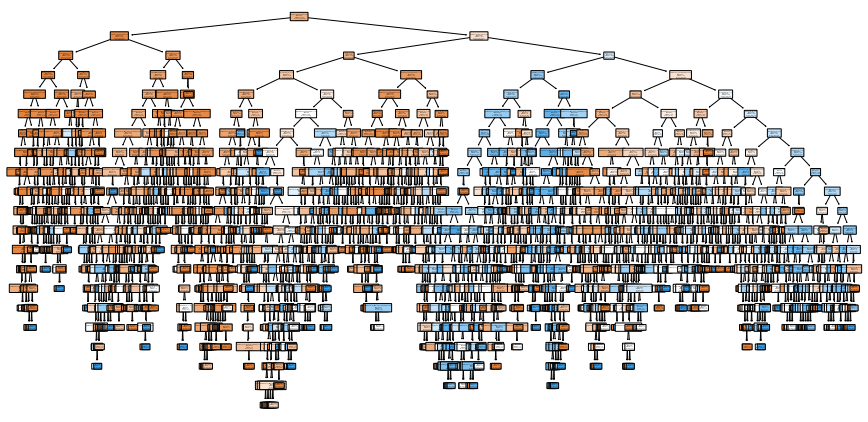

In [23]:
## Já é possível desenhar a árvore, mas por ser muito extensa, é dificultoso entender a decisão a ser tomada
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No Churn", "Churn"], 
          feature_names=x.columns); 

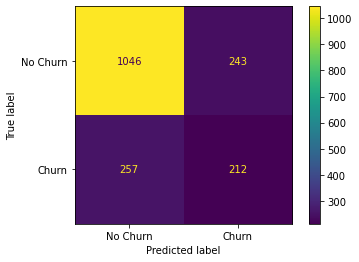

In [24]:
## plot_confusion_matrix() classificará os dados na Matriz de Confusão
plot_confusion_matrix(clf_dt, x_test, y_test, display_labels=["No Churn","Churn"])

---

## Encontrar valor ótimo para alpha para otimizar algorítimo

In [25]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train) # determinar um valor para alpha
ccp_alphas = path.ccp_alphas # extrair diferentes valores para alpha
ccp_alphas = ccp_alphas[:-1] # isolar o maior valor de alpha

clf_dts = [] # criar um array onde será colocada a árvore de decisão

## Agora, criar uma árvore de decisão por valor de alpha e guardar resultado no array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train, y_train)
    clf_dts.append(clf_dt)

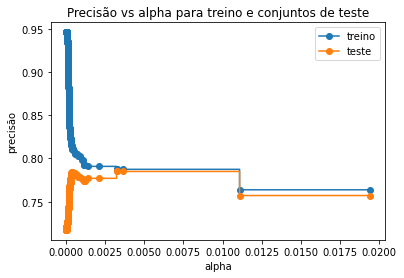

In [26]:
# Desenhando o gráfico de acurácia entre treino e teste conforme os valores de alpha
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("precisão")
ax.set_title("Precisão vs alpha para treino e conjuntos de teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='árvore'>

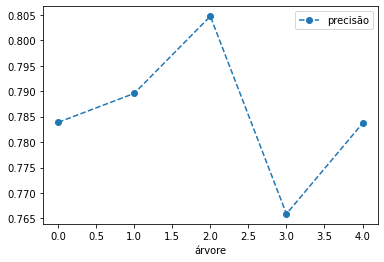

In [27]:
clf_dt = DecisionTreeClassifier(random_state=35, ccp_alpha=0.0032) # criar a árvore com ccp_alpha=0.0032

## Serão realizadas 5 estapas de cross validation para criar 5 conjuntos de dados de treino e teste que
## posteriormente serão usados para escrolher os cunjontos da árvore de decisão.
## (pode ser feito com outros valores além de 5 para o número de etapas)
scores = cross_val_score(clf_dt, x_train, y_train, cv=5) 
df = pd.DataFrame(data={'árvore': range(5), 'precisão': scores})

df.plot(x='árvore', y='precisão', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

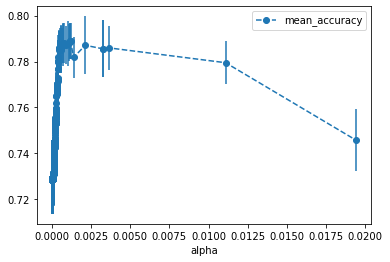

In [28]:
## Criar um array para guardar os resultadosde cada  results of each fold during cross validiation
alpha_loop_values = []

## Para cada candidato ao valor de alpha, será feito um teste de 5 etapas de cross validation.
## O resultado de média e desvio padrão serão guardados para entender a precisão de cada valor de alpha
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Agora é possível desenhar o gráfico com as médias e desvios padrões para cada candidato ao valor de alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [29]:
alpha_results[(alpha_results['alpha'] > 0.0020)
              &
              (alpha_results['alpha'] < 0.0032)]

,alpha,mean_accuracy,std
563,0.002135,0.787068,0.012637


Usando cross validation, é possível observar que, de modo geral, ao invés de usar ccp_alpha=0.0032, é melhor usar um valor próximo à 0.002135. Podemos achar o valor ideal fazendo:

In [30]:
alpha_ideal = alpha_results[(alpha_results['alpha'] > 0.0020)
              &
              (alpha_results['alpha'] < 0.0032)]['alpha']
alpha_ideal

563    0.002135
Name: alpha, dtype: float64

In [31]:
## converter ideal_ccp_alpha de série para float (ponto flutuante) para obter o valor exato:
alpha_ideal = float(alpha_ideal)
alpha_ideal

0.0021347563534391684

## Testando algoritimo com valor otimo de alpha

In [32]:
## Construindo e treinando a árvore de decisão, mas usando o valor ótimo de alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=35, 
                                       ccp_alpha=alpha_ideal)
clf_dt_pruned = clf_dt_pruned.fit(x_train, y_train) 

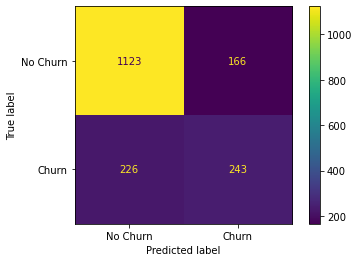

In [33]:
plot_confusion_matrix(clf_dt_pruned, 
                      x_test, 
                      y_test, 
                      display_labels=["No Churn", "Churn"])

### Árvore de decisão efetivamente melhorada!

Das 1.123 + 166 = 1.289 pessoas que realizara Churn, 1.123 (87%) foram classificadas corretamente! Isso foi uma melhoria em relação à Árvore de Decisão inicial com diversos valores, que, por sua vez, classificou 1.046 (81%) de clientes que realizaram Churn. 

Das 226 + 243 = 469 pessoas que realizara Churn, 243 (52%) foram classificadas corretamente! Comparando com a Árvore de Decisão inicial com diversos valores, foram classificados corretamente 212 (45%) clientes que realizaram Churn.

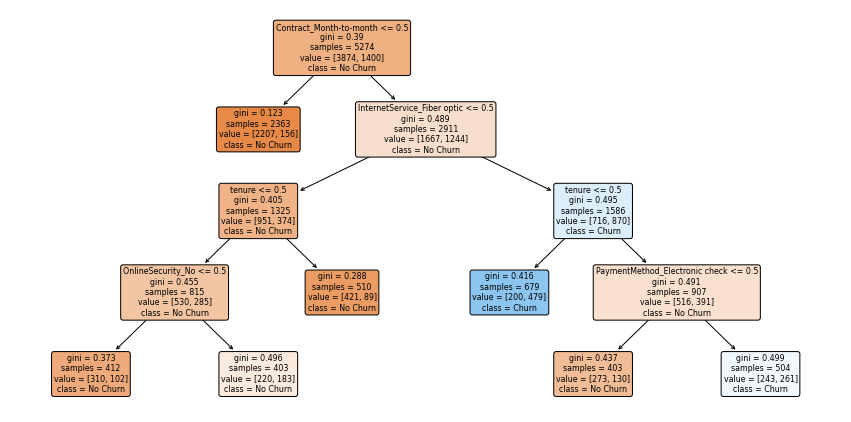

In [34]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No Churn", "Churn"], 
          feature_names=x.columns); 

## Próximos passos

1. Traduzir para português **CHECK**
2. Explicar o racional das colunas (novas colunas) **CHECK**
3. Análise qualitativa do resultado (matriz confusão e arvore de decisão)